In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Face Mask Dataset

In [5]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [9]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/drive/MyDrive/Classroom/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [12]:
!ls

data  drive  sample_data


**Importing the Dependencies**

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [11]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1641.jpg', 'with_mask_57.jpg', 'with_mask_752.jpg', 'with_mask_1577.jpg', 'with_mask_154.jpg']
['with_mask_1541.jpg', 'with_mask_2659.jpg', 'with_mask_1444.jpg', 'with_mask_3007.jpg', 'with_mask_2217.jpg']


In [13]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3020.jpg', 'without_mask_68.jpg', 'without_mask_19.jpg', 'without_mask_1458.jpg', 'without_mask_3135.jpg']
['without_mask_3278.jpg', 'without_mask_1471.jpg', 'without_mask_298.jpg', 'without_mask_2696.jpg', 'without_mask_574.jpg']


In [14]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [15]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [16]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [17]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [18]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

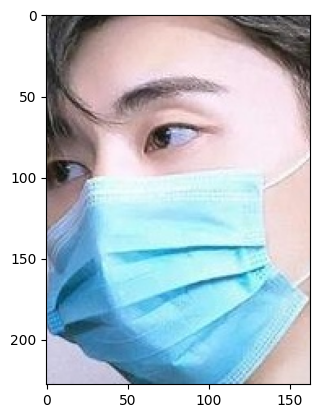

In [19]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

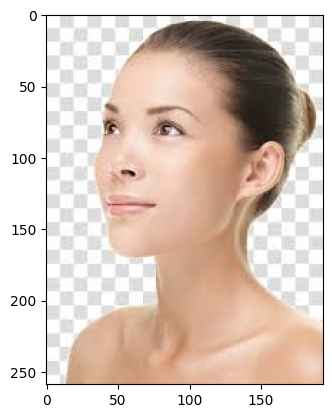

In [20]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [21]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [22]:
type(data)

list

In [23]:
len(data)

7553

array([[[222, 222, 230],
        [222, 222, 230],
        [222, 223, 228],
        ...,
        [232, 233, 235],
        [232, 233, 235],
        [232, 233, 235]],

       [[222, 222, 230],
        [222, 222, 230],
        [222, 223, 228],
        ...,
        [232, 233, 235],
        [232, 233, 235],
        [232, 233, 235]],

       [[222, 222, 230],
        [222, 222, 230],
        [222, 223, 228],
        ...,
        [232, 233, 235],
        [232, 233, 235],
        [232, 233, 235]],

       ...,

       [[ 65,  83,  89],
        [ 65,  83,  88],
        [ 65,  83,  88],
        ...,
        [115,  32,  48],
        [116,  32,  48],
        [116,  31,  48]],

       [[ 50,  67,  77],
        [ 50,  67,  77],
        [ 50,  67,  77],
        ...,
        [116,  33,  49],
        [117,  32,  49],
        [119,  31,  48]],

       [[ 34,  49,  64],
        [ 34,  49,  64],
        [ 34,  49,  63],
        ...,
        [116,  30,  47],
        [117,  30,  47],
        [118,  31,  48]]], dtype=uint8)
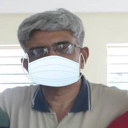

In [24]:
data[0]

In [25]:
type(data[0])

numpy.ndarray

In [26]:
data[0].shape

(128, 128, 3)

In [27]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [28]:
type(X)

numpy.ndarray

In [29]:
type(Y)

numpy.ndarray

In [30]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [31]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [34]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[236, 237, 239],
        [237, 238, 240],
        [237, 238, 240],
        ...,
        [239, 240, 242],
        [239, 240, 242],
        [238, 239, 241]],

       [[236, 237, 239],
        [237, 238, 240],
        [237, 238, 240],
        ...,
        [239, 240, 242],
        [239, 240, 242],
        [238, 239, 241]],

       [[236, 237, 239],
        [237, 238, 240],
        [237, 238, 240],
        ...,
        [239, 240, 242],
        [239, 240, 242],
        [238, 239, 241]],

       ...,

       [[158, 177, 199],
        [151, 169, 195],
        [137, 155, 185],
        ...,
        [ 81,  98, 134],
        [ 80,  97, 133],
        [ 79,  94, 132]],

       [[149, 175, 199],
        [140, 163, 192],
        [128, 150, 183],
        ...,
        [ 78,  93, 129],
        [ 77,  93, 129],
        [ 80,  96, 133]],

       [[139, 160, 189],
        [134, 156, 186],
        [124, 146, 179],
        ...,
        [ 74,  90, 124],
        [ 74,  89, 124],
        [ 71,  87, 123]]], dtype=uint8)
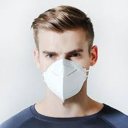

In [35]:
X_train[0]

In [36]:
X_train_scaled[0]

array([[[0.9254902 , 0.92941176, 0.9372549 ],
        [0.92941176, 0.93333333, 0.94117647],
        [0.92941176, 0.93333333, 0.94117647],
        ...,
        [0.9372549 , 0.94117647, 0.94901961],
        [0.9372549 , 0.94117647, 0.94901961],
        [0.93333333, 0.9372549 , 0.94509804]],

       [[0.9254902 , 0.92941176, 0.9372549 ],
        [0.92941176, 0.93333333, 0.94117647],
        [0.92941176, 0.93333333, 0.94117647],
        ...,
        [0.9372549 , 0.94117647, 0.94901961],
        [0.9372549 , 0.94117647, 0.94901961],
        [0.93333333, 0.9372549 , 0.94509804]],

       [[0.9254902 , 0.92941176, 0.9372549 ],
        [0.92941176, 0.93333333, 0.94117647],
        [0.92941176, 0.93333333, 0.94117647],
        ...,
        [0.9372549 , 0.94117647, 0.94901961],
        [0.9372549 , 0.94117647, 0.94901961],
        [0.93333333, 0.9372549 , 0.94509804]],

       ...,

       [[0.61960784, 0.69411765, 0.78039216],
        [0.59215686, 0.6627451 , 0.76470588],
        [0.5372549 , 0

**Building a Convolutional Neural Networks (CNN)**

In [37]:
from tensorflow import keras

In [38]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [39]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [40]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 138s 801ms/step - loss: 0.5360 - acc: 0.7475 - val_loss: 0.3104 - val_acc: 0.8744
Epoch 2/5
170/170 [==============================] - 127s 749ms/step - loss: 0.3091 - acc: 0.8781 - val_loss: 0.2658 - val_acc: 0.8860
Epoch 3/5
170/170 [==============================] - 131s 772ms/step - loss: 0.2726 - acc: 0.8913 - val_loss: 0.2597 - val_acc: 0.9008
Epoch 4/5
170/170 [==============================] - 128s 750ms/step - loss: 0.2304 - acc: 0.9095 - val_loss: 0.2506 - val_acc: 0.8826
Epoch 5/5
170/170 [==============================] - 126s 742ms/step - loss: 0.2017 - acc: 0.9226 - val_loss: 0.2046 - val_acc: 0.9190


**Model Evaluation**

In [41]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 10s 204ms/step - loss: 0.1958 - acc: 0.9272
Test Accuracy = 0.9272005558013916


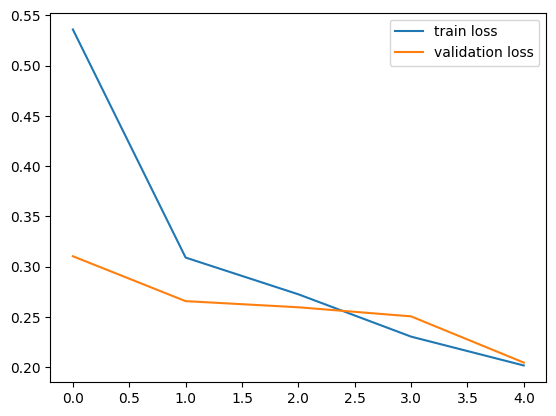

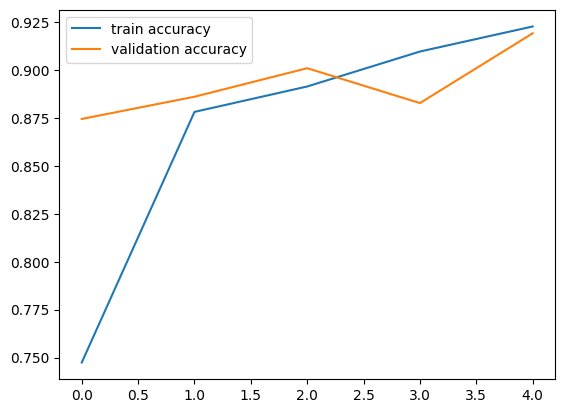

In [42]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is not wearing a mask')

else:

  print('The person in the image is wearing a mask')
